# Day 22 K Means Clustering 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
# Model Creation
from sklearn.cluster import KMeans # import clustering model (KMeans)
from sklearn.preprocessing import StandardScaler # to normalize the data to make clusters

df['age'].fillna(df['age'].mean(),inplace=True)
# create the feature 
X = df[['age','fare']] 

# scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# perform clustering
model = KMeans(n_clusters=3)
model.fit(x_scaled)

# assign cluster labels to the data
df['cluster']=model.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_11184\2185924634.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [4]:
df.head() # Cluster Column is Created in the dataframe

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [5]:
df['cluster'].unique() # To Print Unique Values of Cluster Column

array([2, 0, 1], dtype=int32)

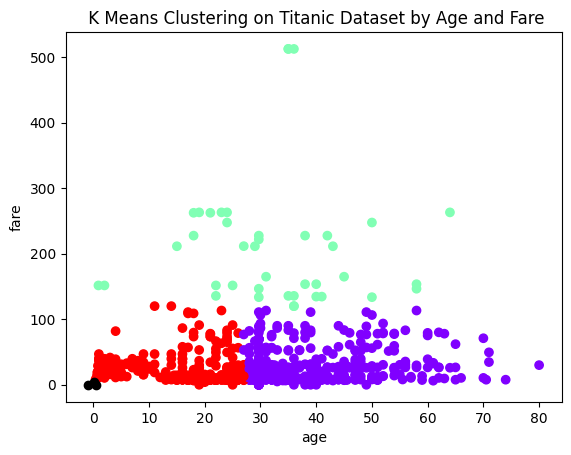

In [6]:
plt.scatter(df['age'],df['fare'],c=df['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.xlabel('age')
plt.ylabel('fare')
plt.title(' K Means Clustering on Titanic Dataset by Age and Fare') 
plt.show()

In [7]:
import plotly.express as px
fig = px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [36]:
!pip install plotly
!pip install nbformat